# 1.3 Condición de un problema y estabilidad de un algoritmo

Dos temas fundamentales en el análisis numérico son: la condición de un problema y estabilidad de un algoritmo.

In [4]:

fun<-function(val){
    set.seed(val)
    kappa(matrix(rnorm(25),ncol=5,nrow=5),exact=TRUE)
}
l_mat <- lapply(1:5,fun)


In [5]:
l_mat

[[1]]
[1] 79.44065

[[2]]
[1] 6.129733

[[3]]
[1] 23.08583

[[4]]
[1] 14.33586

[[5]]
[1] 11.39166

In [7]:
options(repr.plot.width=4, repr.plot.height=3)

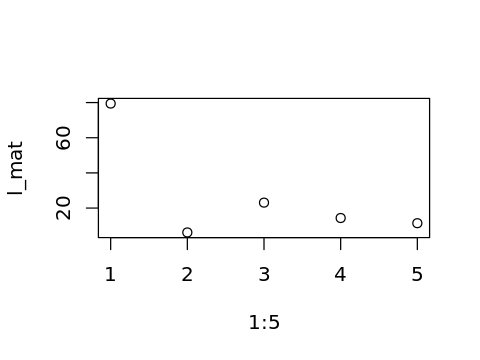

In [8]:
plot(1:5,l_mat)